# Prediction Using Unsupervised Machine Learning

## Author-Tania Das

## Task

##### Iris dataset is given.We need to predict the optimum number of clusters and represent it visually.

In [36]:
#filter warnings
import warnings
warnings.filterwarnings('ignore')

#importing the required libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
%matplotlib inline

## Reading The Dataset For Further Analysis

In [37]:
#setting the working directory
os.chdir(R'C:\Users\TANIA DAS\Downloads')

#loading the csv data into a data frame
iris=pd.read_csv('Iris.csv')
print("Data is imported successfully")

Data is imported successfully


# Exploratory Data Analysis

In [38]:
iris.head() # Head of the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
iris.shape # Checking the dimension of the data

(150, 6)

In [40]:
iris.columns # Viewinng the column names

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [41]:
iris = iris.drop(['Id'], axis = 1)#dropping the id column since its unique and hence no aggregation can be made on it
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
iris.shape # Checking the final dimension of the data after dropping the variable

(150, 5)

In [43]:
iris.dtypes  # Checking the structure of the data

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [44]:
iris.info()# Checking the column information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
# Checking for missing values if any
iris.isnull().sum().sort_values(ascending=False)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missing values in the dataset.

In [46]:
iris.describe()# Summary of all numerical data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

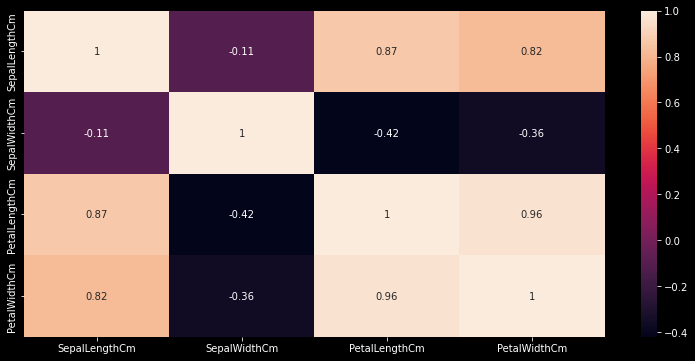

In [47]:
# Finding the correlation and plotting it
corr_data=iris.corr()
display(corr_data)
plt.style.use('dark_background')
plt.subplots(figsize=(13,6))
sns.heatmap(corr_data,annot=True)

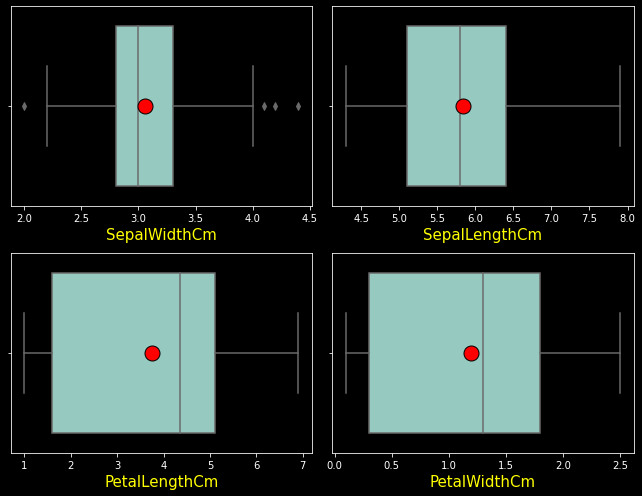

In [48]:
# Checking outliers by plotting boxplots for continuous variables
plt.style.use('dark_background')
plt.figure(figsize=(9,7))
plt.subplot(2,2,1)
sns.boxplot(iris['SepalWidthCm'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':15})
plt.xlabel('SepalWidthCm',fontdict={'color':'yellow','fontsize':15})

plt.subplot(2,2,2)
sns.boxplot(iris['SepalLengthCm'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':15})
plt.xlabel('SepalLengthCm',fontdict={'color':'yellow','fontsize':15})

plt.subplot(2,2,3)
sns.boxplot(iris['PetalLengthCm'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':15})
plt.xlabel('PetalLengthCm',fontdict={'color':'yellow','fontsize':15})

plt.subplot(2,2,4)
sns.boxplot(iris['PetalWidthCm'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'red','markeredgecolor':'black','markersize':15})
plt.xlabel('PetalWidthCm',fontdict={'color':'yellow','fontsize':15})

plt.tight_layout()

There are no outliers

## Univariate Analysis

In [49]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

From the above data we can say that, the iris dataset is a balanced dataset as the number of datapoints for every class are same.


Text(0, 0.5, 'COUNT')

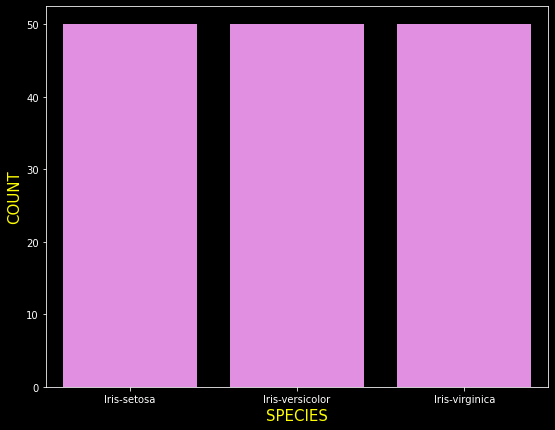

In [50]:
plt.style.use('dark_background')
plt.subplots(figsize=(9,7))
sns.countplot(iris['Species'],color='Violet')
plt.xlabel('SPECIES',fontdict={'color':'yellow','size':15})
plt.ylabel('COUNT',fontdict={'color':'yellow','size':15})

Text(0.5, 0, 'PetalLenghth')

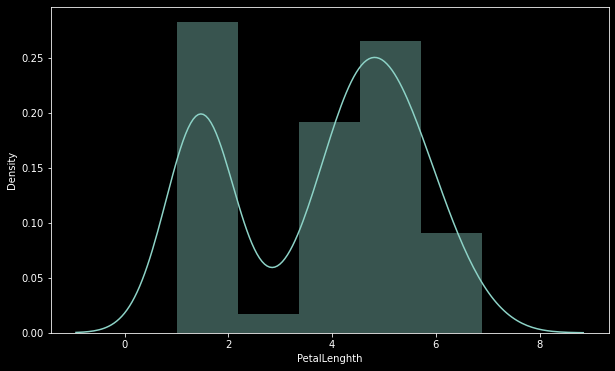

In [51]:
plt.figure(figsize=(10,6))
sns.distplot(iris["PetalLengthCm"])
plt.xlabel('PetalLenghth')

Text(0.5, 0, 'SepalLenghth')

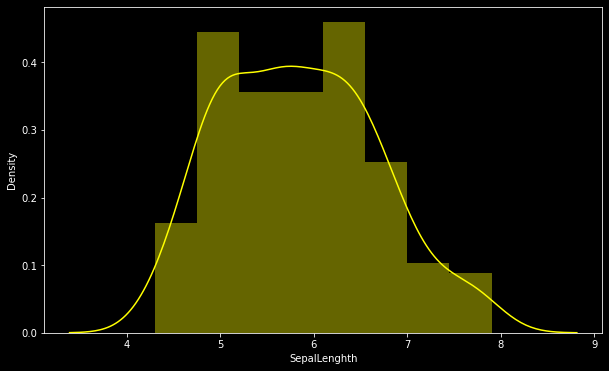

In [52]:
plt.figure(figsize=(10,6))
sns.distplot(iris["SepalLengthCm"],color='yellow')
plt.xlabel('SepalLenghth')

Text(0.5, 0, 'PetalWidth')

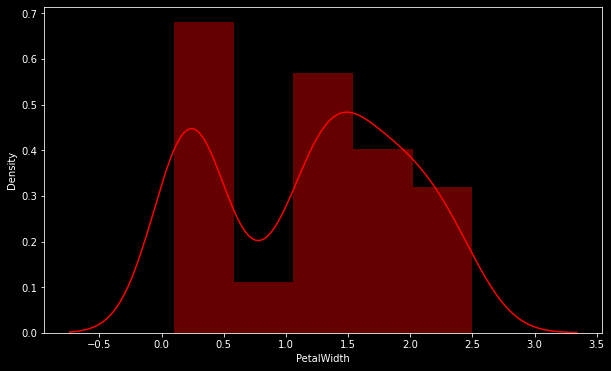

In [53]:
plt.figure(figsize=(10,6))
sns.distplot(iris["PetalWidthCm"],color='red')
plt.xlabel('PetalWidth')

Text(0.5, 0, 'SepalWidth')

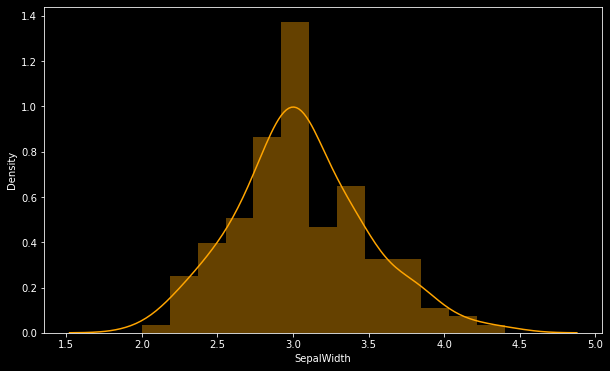

In [54]:
plt.figure(figsize=(10,6))
sns.distplot(iris["SepalWidthCm"],color='orange')
plt.xlabel('SepalWidth')

## Bivariate Analysis

Text(0.5, 1.0, 'Petal Width Vs Petal Length')

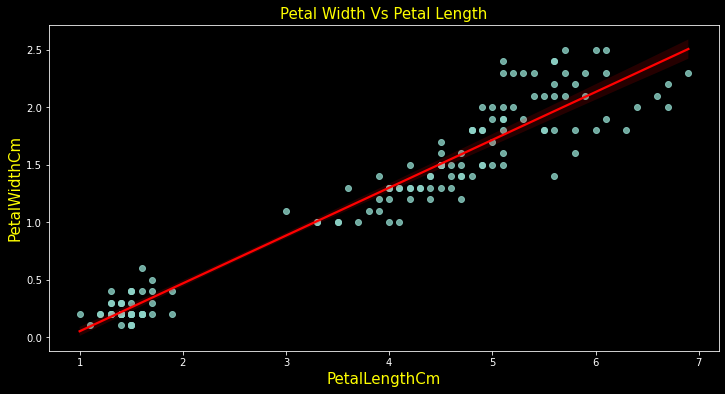

In [55]:
plt.subplots(figsize=(12,6))
sns.regplot(x=iris['PetalLengthCm'],y=iris['PetalWidthCm'],line_kws={'color':'red'})
plt.xlabel('PetalLengthCm',fontdict={'color':'yellow','size':15})
plt.ylabel('PetalWidthCm',fontdict={'color':'yellow','size':15})
plt.title('Petal Width Vs Petal Length',fontdict={'color':'yellow','size':15})

Text(0.5, 1.0, 'Sepal Width Vs Sepal Length')

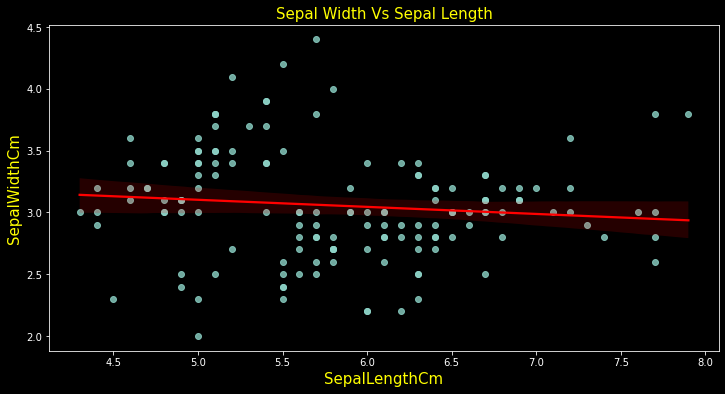

In [56]:
plt.subplots(figsize=(12,6))
sns.regplot(x=iris['SepalLengthCm'],y=iris['SepalWidthCm'],line_kws={'color':'red'})
plt.xlabel('SepalLengthCm',fontdict={'color':'yellow','size':15})
plt.ylabel('SepalWidthCm',fontdict={'color':'yellow','size':15})
plt.title('Sepal Width Vs Sepal Length',fontdict={'color':'yellow','size':15})

There is a strong positive relationship between petal length and petal width and weak negative relationship between sepal length and sepal width

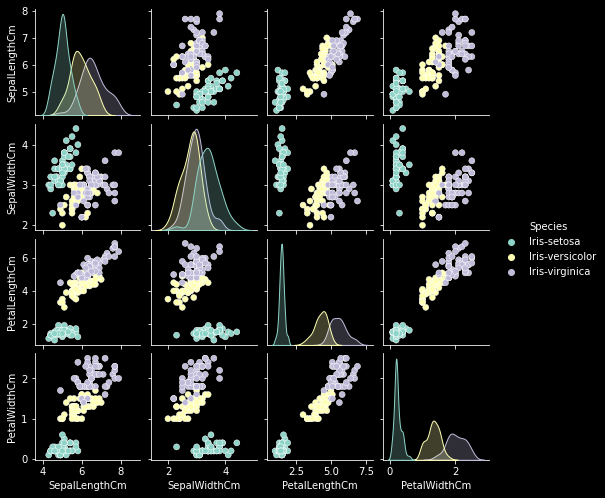

In [57]:
#Plotting Pairplot
plt.style.use('dark_background')
sns.pairplot(iris,hue="Species",size=1.75);
plt.show()


In [58]:
# Converting Categorical Features into Numeric
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(iris['Species'])
iris['Species']=label.transform(iris['Species'])


## Scaling The Data

In [59]:
new=iris.iloc[:,[0,1,2,3]].values
scaling=StandardScaler().fit(new)
new=scaling.transform(new)


## Elbow Method For Optimal Value Of k in KMeans

In [68]:
distortions = [] #It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.[Measure of Hetrogeneity]
inertias = [] # It is the sum of squared distances of samples to their closest cluster center.[Measure of Homogenity]
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 

In [69]:
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k,random_state=0).fit(new)
    kmeanModel.fit(new)

    distortions.append(sum(np.min(cdist(new, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / new.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(new, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / new.shape[0]
    mapping2[k] = kmeanModel.inertia_

1 : 1.8646205767971828
2 : 1.0642507146657962
3 : 0.864104415693925
4 : 0.776530824292977
5 : 0.6969934330939893
6 : 0.6589851296449323
7 : 0.6198668448386784
8 : 0.5717236178676084
9 : 0.5425015253514345


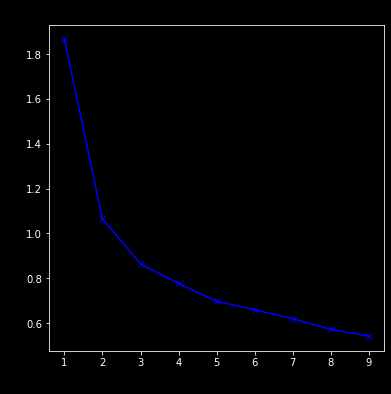

1 : 600.0000000000003
2 : 223.73200573676343
3 : 140.96581663074699
4 : 114.6822160993797
5 : 91.19197002146461
6 : 80.19300510158155
7 : 71.3007056411862
8 : 62.45268372832474
9 : 54.31087378179731


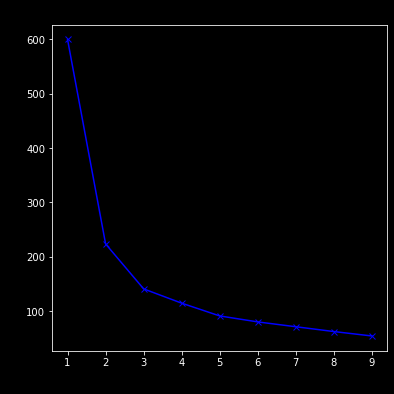

In [70]:
# Based on Distortions
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 
    
plt.subplots(figsize=(6,6))    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K',fontdict={'color':'Black','size':15}) 
plt.ylabel('Distortion',fontdict={'color':'Black','size':15}) 
plt.title('The Elbow Method Using Distortion',fontdict={'color':'Black','size':15}) 
plt.show() 

#Based on Inertia
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val))
    
plt.subplots(figsize=(6,6))    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K',fontdict={'color':'Black','size':15})
plt.ylabel('Inertia',fontdict={'color':'Black','size':15}) 
plt.title('The Elbow Method Using Inertia',fontdict={'color':'Black','size':15})
plt.show() 


It is clear from the figure that we should take the number of clusters equal to 3, as the slope of the curve is not steep enough after it.

## K-Means Clustering

In [71]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
y_kmeans = kmeans.fit_predict(new)

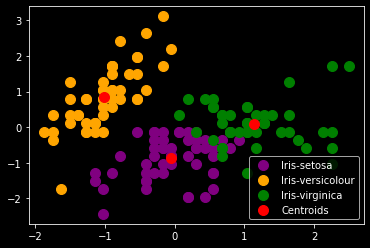

In [64]:
#Visualising the clusters
plt.scatter(new[y_kmeans == 0, 0], new[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(new[y_kmeans == 1, 0], new[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(new[y_kmeans == 2, 0], new[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

This shows the clusters present in the given dataset among species setosa, versicolour, virginica.